## 14 Pandas Example - Learning about Weather with DWD

The German weather service (DWD) provides access to raw data through an FTP server:
    
* https://www.dwd.de/DE/leistungen/opendata/opendata.html, previously: ftp://ftp-cdc.dwd.de/pub/CDC/

* Two files are merged in the process: one for weather data (March 2003 worldwide data on temperature, precipitation) and another about information on the station (name, country, ...).
* Simple outlier detection is applied for data cleaning.
* Find and rank the most snowy places for this time frame.
* Plot temperature and rain distributions.

In [1]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

In [4]:
# example = "ftp://ftp-cdc.dwd.de/pub/CDC/observations_global/CLIMAT/monthly/raw/CLIMAT_RAW_200303.txt"
example = "https://opendata.dwd.de/climate_environment/CDC/observations_global/CLIMAT/monthly/raw/CLIMAT_RAW_200303.txt"
dfr = pd.read_csv(example, sep=";")

Trying to convert float column to int fails, if there are null values:
    
> ValueError: Cannot convert non-finite values (NA or inf) to integer

* https://stackoverflow.com/questions/41985063/cannot-convert-nan-to-int-but-there-are-no-nans

Several options:

* Convert float column to int, with a fillna(0.0) before astype
* Drop columns with a NA value beforehand: https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan


In [5]:
len(dfr)

1966

In [6]:
dfr.shape

(1966, 127)

In [7]:
dfr.head()

,year,month,IIiii,G1,Po,G1.1,P,G1.2,sn,T,...,iw,fx,yfx,G4.6,Dts,Dgr,G4.7,iy,Gx,Gn
0,2003,3.0,1001.0,1.0,10047.0,2.0,10059.0,3.0,1.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,3.0,1008.0,1.0,9995.0,2.0,10031.0,3.0,1.0,173.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003,3.0,1025.0,1.0,10058.0,2.0,10068.0,3.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,3.0,1026.0,1.0,9924.0,2.0,10067.0,3.0,1.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003,3.0,1028.0,1.0,9991.0,2.0,10011.0,3.0,1.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dfr.shape

(1966, 127)

In [9]:
dfr["IIiii"].dtype

dtype('float64')

How many rows, where the column "IIiii" isundefined?

In [10]:
dfr[dfr["IIiii"].isnull()]

,year,month,IIiii,G1,Po,G1.1,P,G1.2,sn,T,...,iw,fx,yfx,G4.6,Dts,Dgr,G4.7,iy,Gx,Gn
1965,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can drop this column.

In [11]:
df = dfr.dropna(subset=["IIiii"])
df = df.copy()

In [12]:
df.head()

,year,month,IIiii,G1,Po,G1.1,P,G1.2,sn,T,...,iw,fx,yfx,G4.6,Dts,Dgr,G4.7,iy,Gx,Gn
0,2003,3.0,1001.0,1.0,10047.0,2.0,10059.0,3.0,1.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,3.0,1008.0,1.0,9995.0,2.0,10031.0,3.0,1.0,173.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003,3.0,1025.0,1.0,10058.0,2.0,10068.0,3.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,3.0,1026.0,1.0,9924.0,2.0,10067.0,3.0,1.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003,3.0,1028.0,1.0,9991.0,2.0,10011.0,3.0,1.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.tail()

,year,month,IIiii,G1,Po,G1.1,P,G1.2,sn,T,...,iw,fx,yfx,G4.6,Dts,Dgr,G4.7,iy,Gx,Gn
1960,2003,3.0,98550.0,1.0,10109.0,2.0,10112.0,3.0,0.0,271.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,2003,3.0,98637.0,1.0,10111.0,2.0,10118.0,3.0,0.0,283.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,2003,3.0,98644.0,1.0,10109.0,2.0,10118.0,3.0,0.0,278.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,2003,3.0,98646.0,1.0,10100.0,2.0,10114.0,3.0,0.0,278.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,2003,3.0,98653.0,1.0,10078.0,2.0,10113.0,3.0,0.0,279.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df["IIiii"].dtype # The na dropping revisited this column? No.

dtype('float64')

In [15]:
df.loc[:, "IIiii"] = df.loc[:, "IIiii"].astype(int)

In [17]:
# bool(df.is_copy) # has been deprecated and removed

* https://www.dataquest.io/blog/settingwithcopywarning/
    
> SettingWithCopyWarning is one of the most common hurdles people run into when learning pandas. A quick web search will reveal scores of Stack Overflow questions, GitHub issues and forum posts from programmers trying to wrap their heads around what this warning means in their particular situation. It's no surprise that many struggle with this; there are so many ways to index pandas data structures, each with its own particular nuance, and even pandas itself does not guarantee one single outcome for two lines of code that may look identical.

```
pd.set_option('mode.chained_assignment', None)
```

Or we can only keep the finite values with `df = dfr[np.isfinite(dfr['IIiii'])]`

In [18]:
df.shape

(1965, 127)

Let focus on the first three columns.

In [19]:
df.iloc[:, 0:3].head()

,year,month,IIiii
0,2003,3.0,1001.0
1,2003,3.0,1008.0
2,2003,3.0,1025.0
3,2003,3.0,1026.0
4,2003,3.0,1028.0


Note: If we would need to convert the weather station id to an int.

The stanza:

```
df["IIiii"] = df["IIiii"].astype(int)
```

would yield a SettingsWithCopy warning.

* http://pandas-docs.github.io/pandas-docs-travis/indexing.html#why-does-assignment-fail-when-using-chained-indexing

There is a global setting to turn of the warning, or a local, per object setting via `df.is_copy`.

In [20]:
df.head()

,year,month,IIiii,G1,Po,G1.1,P,G1.2,sn,T,...,iw,fx,yfx,G4.6,Dts,Dgr,G4.7,iy,Gx,Gn
0,2003,3.0,1001.0,1.0,10047.0,2.0,10059.0,3.0,1.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,3.0,1008.0,1.0,9995.0,2.0,10031.0,3.0,1.0,173.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003,3.0,1025.0,1.0,10058.0,2.0,10068.0,3.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,3.0,1026.0,1.0,9924.0,2.0,10067.0,3.0,1.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003,3.0,1028.0,1.0,9991.0,2.0,10011.0,3.0,1.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Column documentation can be found here:
    
* https://opendata.dwd.de/climate_environment/CDC/observations_global/CLIMAT/monthly/raw/BESCHREIBUNG_obsglobal_monthly_raw_de.pdf

We will trim down the set of columns for our investigation to:

* year (year)
* month (month)
* station id (IIiii)
* average daily max of the month (Tx)
* average number of hours of sunshine (S1)
* number of rainy days (nr)
* maximum temperatur of the month (Tax), 1/10 °C
* days with thunderstorm (Dts)
* Snow (above 1, 10, 50, ... mm) (s00, s01, s10, s50)

The month column is still float, which seems to indicate some missing values.

In [21]:
df = df.iloc[:-1]

In [22]:
df["month"].dtype

dtype('float64')

In [23]:
df.loc[:, "month"] = df.loc[:, "month"].astype(int)

In [24]:
df["month"].dtype

dtype('float64')

First, load station data, so we can map ids to locations.

In [25]:
stations_url = "https://opendata.dwd.de/climate_environment/CDC/help/stations_list_CLIMAT_data.txt"
stations = pd.read_csv(stations_url, sep=";", encoding='latin-1')

In [26]:
stations.head()

,WMO-Station ID,StationName,Latitude,Longitude,Height,Country
0,01001,Jan Mayen,70.94,-08.67,9,Norway
1,01005,Isfjord Radio,78.06,13.63,9,Norway
2,01007,Ny-Alesund,78.92,11.93,8,Norway
3,01008,Svalbard,78.25,15.50,27,Norway
4,01025,Tromso,69.68,18.91,9,Norway


In [27]:
small = df[["year", "month", "IIiii", "Tx", "Tax", "nr", "S1", "Dts", "s00", "s01", "s10", "s50"]]

In [28]:
small.shape

(1964, 12)

In [29]:
small.head()

,year,month,IIiii,Tx,Tax,nr,S1,Dts,s00,s01,s10,s50
0,2003,3.0,1001.0,1.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,3.0,1008.0,142.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2003,3.0,1025.0,22.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,3.0,1026.0,18.0,NaN,22.0,53.0,NaN,NaN,NaN,NaN,NaN
4,2003,3.0,1028.0,36.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN


Let's rename the station column on both frames, so we can join them on it easily. Usually we would have to specify all column names, but there is a shortcut.

In [30]:
small = small.rename(columns={'IIiii':'station'})

In [31]:
small.head()

,year,month,station,Tx,Tax,nr,S1,Dts,s00,s01,s10,s50
0,2003,3.0,1001.0,1.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,3.0,1008.0,142.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2003,3.0,1025.0,22.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,3.0,1026.0,18.0,NaN,22.0,53.0,NaN,NaN,NaN,NaN,NaN
4,2003,3.0,1028.0,36.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
stations = stations.rename(columns={"WMO-Station ID": "station"})

In [33]:
stations.head()

,station,StationName,Latitude,Longitude,Height,Country
0,01001,Jan Mayen,70.94,-08.67,9,Norway
1,01005,Isfjord Radio,78.06,13.63,9,Norway
2,01007,Ny-Alesund,78.92,11.93,8,Norway
3,01008,Svalbard,78.25,15.50,27,Norway
4,01025,Tromso,69.68,18.91,9,Norway


In [34]:
len(stations)

4683

In [40]:
# stations.groupby(' Country                  ').size().mean()
stations.groupby(' Country').size().mean() # note the whitespace (changed a bit from last version)

21.981220657276996

A simple join - `small.join(stations)` would yield:
    
> ValueError: columns overlap but no suffix specified: Index(['station'], dtype='object')
    
https://stackoverflow.com/questions/26645515/pandas-join-issue-columns-overlap-but-no-suffix-specified
    
This happens, because the one or both sets contains values, that are not within the other set.

In [50]:
stations = stations[:-1]

In [52]:
stations["station"] = stations["station"].astype(float)

In [53]:
merged = small.merge(stations, on='station', how='left')

In [54]:
merged.shape

(1964, 17)

Some columes can be reformated, e.g. temperatures.

In [55]:
merged["Tx"] /= 10

In [56]:
merged["Tax"] /= 10

In [57]:
merged.Tx.describe()

count    1883.000000
mean       18.933988
std        10.944482
min         0.000000
25%         9.900000
50%        18.200000
75%        29.300000
max        99.000000
Name: Tx, dtype: float64

There seems to be an outlier: 99°C seems too hot.

In [58]:
merged[merged.Tx > 50]

,year,month,station,Tx,Tax,nr,S1,Dts,s00,s01,s10,s50,StationName,Latitude,Longitude,Height,Country
324,2003,3.0,10836.0,99.0,17.4,5.0,195.0,1.0,6.0,6.0,3.0,0.0,Stoetten,48.67,09.86,739,Germany


Let's get rid of this column using a basic outlier detection technique.

* https://docs.oracle.com/cd/E40248_01/epm.1112/cb_statistical/frameset.htm?ch07s02s10s01.html
* https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-dataframe

Options:

* Mean and Standard Deviation Method
* Median and Median Absolute Deviation Method (MAD)
* Median and Interquartile Deviation Method (IQD)

In [59]:
merged.Tx.mean(), merged.Tx.std()

(18.933988316516196, 10.944481787071332)

> For this outlier detection method, the mean and standard deviation of the residuals are calculated and compared. If a value is a certain number of standard deviations away from the mean, that data point is identified as an outlier. The specified number of standard deviations is called the threshold. The default value is 3.

So start with 3 standard deviations from the mean.

In [60]:
merged.shape

(1964, 17)

In [61]:
merged[np.abs(merged.Tx - merged.Tx.mean()) <= (3 * merged.Tx.std())]

,year,month,station,Tx,Tax,nr,S1,Dts,s00,s01,s10,s50,StationName,Latitude,Longitude,Height,Country
0,2003,3.0,1001.0,0.1,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,Jan Mayen,70.94,-08.67,9,Norway
1,2003,3.0,1008.0,14.2,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Svalbard,78.25,15.50,27,Norway
2,2003,3.0,1025.0,2.2,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,Tromso,69.68,18.91,9,Norway
3,2003,3.0,1026.0,1.8,NaN,22.0,53.0,NaN,NaN,NaN,NaN,NaN,Tromso,69.65,18.94,114,Norway
4,2003,3.0,1028.0,3.6,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,Bjornoya,74.50,19.00,16,Norway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,2003,3.0,96749.0,31.6,33.3,9.0,NaN,9.0,NaN,NaN,NaN,NaN,Jakarta Airport/Java,-06.12,106.65,8,Indonesia
1948,2003,3.0,96839.0,31.8,34.3,11.0,205.0,20.0,0.0,0.0,0.0,0.0,Semarang Airport/Java,-06.98,110.38,3,Indonesia
1949,2003,3.0,96995.0,28.2,29.2,19.0,NaN,NaN,NaN,NaN,NaN,NaN,Christmas Island,-10.45,105.68,262,Australia
1950,2003,3.0,96996.0,30.3,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,Kokos Inseln,-12.19,96.83,4,Australia


In [62]:
merged[np.abs(merged.Tx - merged.Tx.mean()) <= (3 * merged.Tx.std())].shape

(1882, 17)

Or we can just inspect the outliers, by inverting the criteria.

In [63]:
merged[~(np.abs(merged.Tx - merged.Tx.mean()) <= (3 * merged.Tx.std()))].shape

(82, 17)

In [64]:
merged[~(np.abs(merged.Tx - merged.Tx.mean()) <= (3 * merged.Tx.std()))].head()

,year,month,station,Tx,Tax,nr,S1,Dts,s00,s01,s10,s50,StationName,Latitude,Longitude,Height,Country
80,2003,3.0,4210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Upernavik,72.79,-56.14,63,Greenland
81,2003,3.0,4220.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Aasiaat (Egedesminde),68.71,-52.85,41,Greenland
82,2003,3.0,4312.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Station Nord,81.60,-16.65,36,Greenland
83,2003,3.0,4320.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Danmarkshavn,76.77,-18.67,12,Greenland
84,2003,3.0,4339.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Ittoqqortoormiit (Scoresbysund),70.49,-21.95,72,Greenland


Ok, this contains all NaN as well. Filter those for the moment.

In [65]:
withtx = merged[~merged.Tx.isnull()]

In [66]:
withtx[~(np.abs(withtx.Tx - withtx.Tx.mean()) <= (3 * withtx.Tx.std()))]

,year,month,station,Tx,Tax,nr,S1,Dts,s00,s01,s10,s50,StationName,Latitude,Longitude,Height,Country
324,2003,3.0,10836.0,99.0,17.4,5.0,195.0,1.0,6.0,6.0,3.0,0.0,Stoetten,48.67,09.86,739,Germany


Sure enough, this measurement error.

In [67]:
cleantx = withtx[(np.abs(withtx.Tx - withtx.Tx.mean()) <= (3 * withtx.Tx.std()))]

We can show the coldest and hottest places in March 2003.

In [68]:
cleantx[cleantx.Tx == cleantx.Tx.max()]

,year,month,station,Tx,Tax,nr,S1,Dts,s00,s01,s10,s50,StationName,Latitude,Longitude,Height,Country
1014,2003,3.0,61240.0,41.6,41.6,NaN,265.0,2.0,NaN,NaN,NaN,NaN,Hombori,15.29,-01.70,288,Mali


In [69]:
cleantx[cleantx.Tx == cleantx.Tx.min()]

,year,month,station,Tx,Tax,nr,S1,Dts,s00,s01,s10,s50,StationName,Latitude,Longitude,Height,Country
562,2003,3.0,32150.0,0.0,NaN,3.0,221.0,NaN,NaN,NaN,NaN,NaN,Juzhno-Sahalinsk,46.95,142.71,24,Russian Federation


We can combine the above, show coldest and hottest as one liner.

In [70]:
cleantx[cleantx.Tx.isin([cleantx.Tx.min(), cleantx.Tx.max()])]

,year,month,station,Tx,Tax,nr,S1,Dts,s00,s01,s10,s50,StationName,Latitude,Longitude,Height,Country
562,2003,3.0,32150.0,0.0,NaN,3.0,221.0,NaN,NaN,NaN,NaN,NaN,Juzhno-Sahalinsk,46.95,142.71,24,Russian Federation
1014,2003,3.0,61240.0,41.6,41.6,NaN,265.0,2.0,NaN,NaN,NaN,NaN,Hombori,15.29,-01.70,288,Mali


Were there places with 50cm or more snow in March? This means, that merged.s50 is a number and this number (the number of days) was greater than 0).

In [71]:
snowy = merged[~merged.s50.isnull() & merged.s50 > 0]
snowy.size / merged.size * 100

2.4439918533604885

2.44% of places actually had snow. Can we group by continent?

In [72]:
# snowy.groupby('Country') # Would yield a KeyError

In [73]:
snowy.columns

Index(['year', 'month', 'station', 'Tx', 'Tax', 'nr', 'S1', 'Dts', 's00',
       's01', 's10', 's50', ' StationName',
       '                                Latitude', ' Longitude', ' Height',
       ' Country'],
      dtype='object')

Here, we see how unclean data can even hide in places we do not expect. The column names, while printed properly, actually contain spaces, which does not allow us to index into them properly.

```
snowy.Country
```

> AttributeError: 'DataFrame' object has no attribute 'Country'

In [74]:
snowy.columns = map(str.strip, snowy.columns)
snowy.columns

Index(['year', 'month', 'station', 'Tx', 'Tax', 'nr', 'S1', 'Dts', 's00',
       's01', 's10', 's50', 'StationName', 'Latitude', 'Longitude', 'Height',
       'Country'],
      dtype='object')

In [75]:
snowy.groupby(snowy.Country).size().sort_values(ascending=False)

Country
 Canada                                             11
 Finland                                            10
 Germany                                             7
 Japan                                               5
 Sweden                                              3
 Italy                                               2
 Argentina                                           1
 Bosnia and Herzegovina                              1
 China                                               1
 Czech Republic                                      1
 France                                              1
 Romania                                             1
 Slovenia                                            1
 Spain                                               1
 Turkey                                              1
dtype: int64

In 2003, Canada, Finland and Germany have been the most snowy countries with 50cm or more snow for a week or more.

## Temperature plots

Let revisit temperature. Can we bin the temperatures and plot a histogram?

In [76]:
merged.head()

,year,month,station,Tx,Tax,nr,S1,Dts,s00,s01,s10,s50,StationName,Latitude,Longitude,Height,Country
0,2003,3.0,1001.0,0.1,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,Jan Mayen,70.94,-08.67,9,Norway
1,2003,3.0,1008.0,14.2,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Svalbard,78.25,15.50,27,Norway
2,2003,3.0,1025.0,2.2,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,Tromso,69.68,18.91,9,Norway
3,2003,3.0,1026.0,1.8,NaN,22.0,53.0,NaN,NaN,NaN,NaN,NaN,Tromso,69.65,18.94,114,Norway
4,2003,3.0,1028.0,3.6,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,Bjornoya,74.50,19.00,16,Norway


In [77]:
cleantx.head()

,year,month,station,Tx,Tax,nr,S1,Dts,s00,s01,s10,s50,StationName,Latitude,Longitude,Height,Country
0,2003,3.0,1001.0,0.1,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,Jan Mayen,70.94,-08.67,9,Norway
1,2003,3.0,1008.0,14.2,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Svalbard,78.25,15.50,27,Norway
2,2003,3.0,1025.0,2.2,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,Tromso,69.68,18.91,9,Norway
3,2003,3.0,1026.0,1.8,NaN,22.0,53.0,NaN,NaN,NaN,NaN,NaN,Tromso,69.65,18.94,114,Norway
4,2003,3.0,1028.0,3.6,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,Bjornoya,74.50,19.00,16,Norway


<Axes: ylabel='Frequency'>

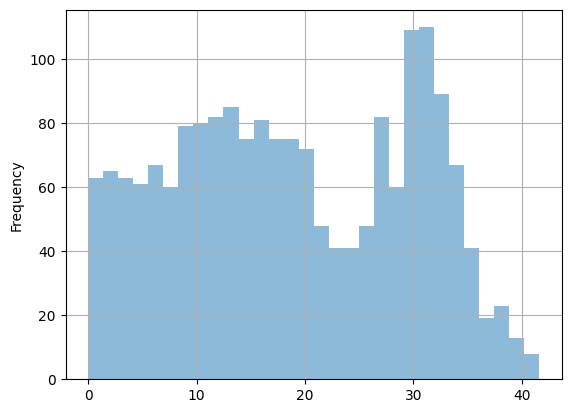

In [78]:
cleantx.Tx.plot.hist(alpha=0.5, grid=True, bins=30)

Let's do the same for the number of rainy day.

<Axes: title={'center': 'Rainy days (World, March 2003)'}, ylabel='Frequency'>

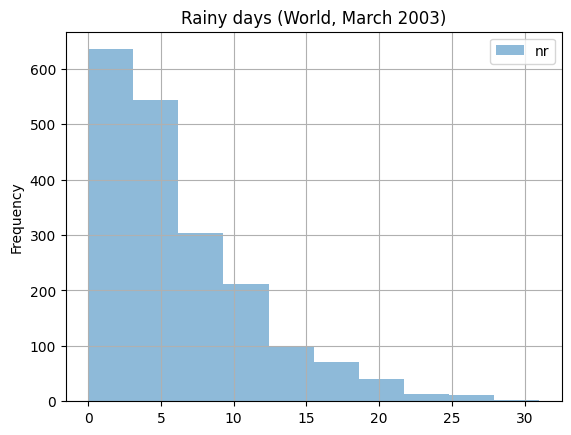

In [79]:
merged[~merged.nr.isnull()].nr.plot.hist(alpha=0.5, grid=True, bins=10,
                                         legend=True, title='Rainy days (World, March 2003)')

And finally sunshine hours.

<Axes: title={'center': 'Monthly sunshine hours'}, ylabel='Frequency'>

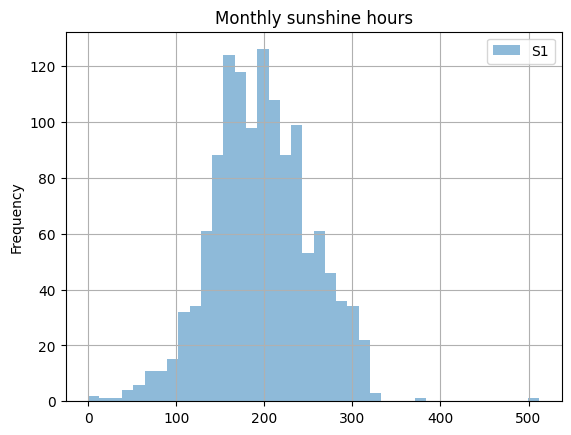

In [80]:
merged[~merged.S1.isnull()].S1.plot.hist(alpha=0.5, grid=True, bins=40, legend=True, title='Monthly sunshine hours')

Can we see the box plots of sunshine hours and number of rainy days?

<Axes: >

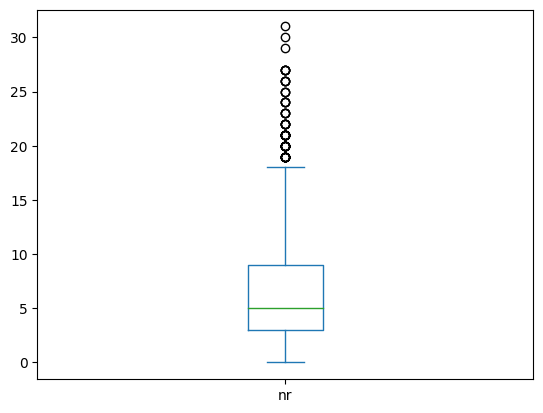

In [81]:
merged[~merged.nr.isnull()].nr.plot.box()

<Axes: >

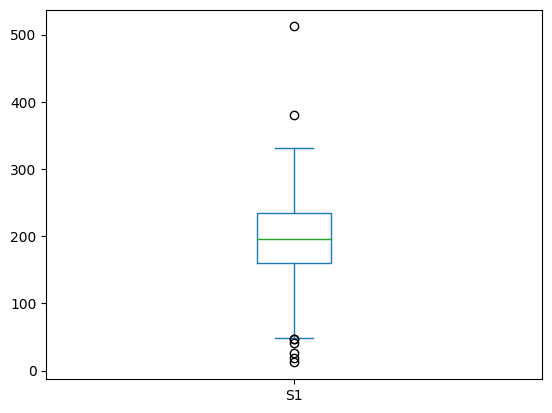

In [82]:
merged[~merged.nr.isnull()].S1.plot.box()

Combine plots. Is the maximum temperature really higher?

<Axes: >

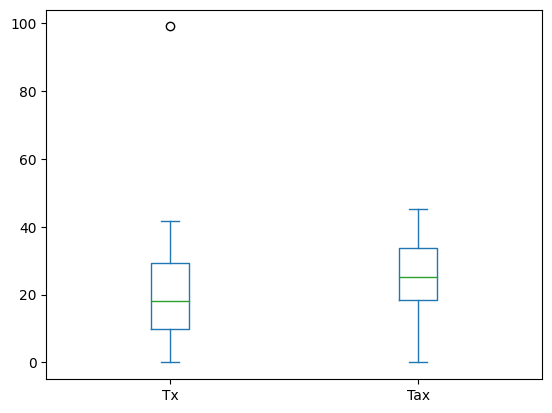

In [83]:
merged[["Tx", "Tax"]].plot.box()

And reusing the cleaned (without outlier) data frame:

<Axes: >

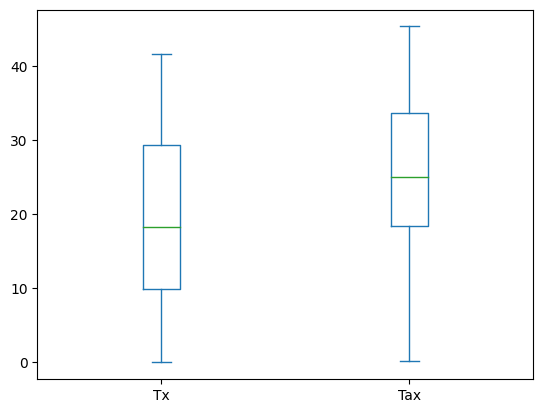

In [84]:
cleantx[["Tx", "Tax"]].plot.box()